In [256]:
%pylab inline

from collections import defaultdict
import pandas as pd

from soln.dataset import get_augmented_train_and_test_set
from soln.dataset import get_component_info_df
from soln.dataset import load_raw_components

pd.set_option('display.max_columns', None)

Populating the interactive namespace from numpy and matplotlib


In [257]:
comp_types, group_dfs, cluster_dfs = load_raw_components()
group_dfs['other'].columns

Index([u'component_id', u'part_name', u'weight'], dtype='object')

In [192]:
# Look for columns that occur in multiple groups:

col_to_groups = defaultdict(list)
for group_name, df in group_dfs.iteritems():
    for col in df.columns:
        col_to_groups[col].append(group_name)

col_groups = col_to_groups.items()
col_groups.sort(key=lambda (col, groups): len(groups), reverse=True)
print len(group_dfs)
for col, groups in col_groups:
    print col, len(groups), groups

11
weight 11 ['threaded', 'sleeve', 'adaptor', 'nut', 'float', 'tee', 'boss', 'other', 'hfl', 'elbow', 'straight']
component_id 11 ['threaded', 'sleeve', 'adaptor', 'nut', 'float', 'tee', 'boss', 'other', 'hfl', 'elbow', 'straight']
orientation 10 ['threaded', 'sleeve', 'adaptor', 'nut', 'float', 'tee', 'boss', 'hfl', 'elbow', 'straight']
component_type_id 10 ['threaded', 'sleeve', 'adaptor', 'nut', 'float', 'tee', 'boss', 'hfl', 'elbow', 'straight']
unique_feature 7 ['threaded', 'sleeve', 'adaptor', 'tee', 'boss', 'elbow', 'straight']
bolt_pattern_wide 5 ['float', 'tee', 'boss', 'elbow', 'straight']
overall_length 5 ['threaded', 'adaptor', 'tee', 'elbow', 'straight']
bolt_pattern_long 5 ['float', 'tee', 'boss', 'elbow', 'straight']
thickness 4 ['float', 'tee', 'elbow', 'straight']
groove 4 ['tee', 'boss', 'elbow', 'straight']
mj_class_code 3 ['tee', 'elbow', 'straight']
nominal_size_2 2 ['threaded', 'adaptor']
nominal_size_1 2 ['threaded', 'adaptor']
adaptor_angle 2 ['threaded', 'adap

In [258]:
cinfo_df = get_component_info_df(comp_types, group_dfs, cluster_dfs)
cinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2046
Data columns (total 48 columns):
adaptor_angle          55 non-null float64
base_diameter          57 non-null float64
base_type              124 non-null object
blind_hole             23 non-null object
bolt_pattern_long      2047 non-null float64
bolt_pattern_wide      2047 non-null float64
component_group_id     2047 non-null object
component_id           2047 non-null object
component_type_id      2047 non-null object
corresponding_shell    6 non-null object
coupling_class         6 non-null object
diameter               23 non-null float64
drop_length            175 non-null float64
elbow_angle            130 non-null float64
extension_length       174 non-null float64
groove                 2047 non-null bool
head_diameter          70 non-null float64
height_over_tube       147 non-null float64
hex_nut_size           42 non-null float64
hex_size               129 non-null float64
hose_diameter          6 no

In [195]:
%time aug_train_set, aug_test_set = get_augmented_train_and_test_set()

CPU times: user 13.6 s, sys: 72 ms, total: 13.7 s
Wall time: 13.9 s


In [211]:
from soln.utils import count_components
train_counts = count_components(aug_train_set, cinfo_df)
train_counts.rename(columns={'count': 'train_count'}, inplace=True)
test_counts = count_components(aug_test_set, cinfo_df)
test_counts.rename(columns={'count': 'test_count'}, inplace=True)
all_counts = cinfo_df[['component_id', 'component_type_id', 'component_group_id']]
all_counts = all_counts.merge(train_counts, on='component_id')
all_counts = all_counts.merge(test_counts, on='component_id')

In [212]:
all_counts

,component_id,component_type_id,component_group_id,train_count,test_count
0,C-0007,CP-014,threaded,13,7
1,C-0030,CP-015,threaded,0,0
2,C-0041,CP-014,threaded,0,0
3,C-0043,CP-014,threaded,0,0
4,C-0044,CP-014,threaded,0,0
5,C-0069,CP-015,threaded,0,0
6,C-0070,CP-015,threaded,0,0
7,C-0072,CP-015,threaded,0,0
8,C-0073,CP-015,threaded,0,0
9,C-0074,CP-014,threaded,0,0


In [214]:
print len(all_counts)
print len(all_counts[(all_counts.train_count > 0) & (all_counts.test_count == 0)])
print len(all_counts[(all_counts.train_count == 0) & (all_counts.test_count > 0)])

2047
520
482


In [223]:
bins = [(0, 0), (1, 1), (2, 5), (5, 10), (10, 20), (20, 50), (50, 100), (100, np.inf)]
all_counts['train_bin'] = -1
for i, (cmin, cmax) in enumerate(bins):
    all_counts.train_bin.loc[(all_counts.train_count >= cmin) & (all_counts.train_count <= cmax)] = i
all_counts['test_bin'] = -1
for i, (cmin, cmax) in enumerate(bins):
    all_counts.test_bin.loc[(all_counts.test_count >= cmin) & (all_counts.test_count <= cmax)] = i

In [240]:
grouped = all_counts.groupby(['train_bin', 'test_bin'])
df = grouped.size().unstack()
df

test_bin,0,1,2,3,4,5,6,7
train_bin,,,,,,,,
0,346,399,81,2,NaN,NaN,NaN,NaN
1,407,140,83,9,NaN,NaN,NaN,NaN
2,111,94,112,38,2,NaN,NaN,NaN
3,2,5,43,37,8,NaN,NaN,NaN
4,NaN,NaN,NaN,13,41,2,NaN,NaN
5,NaN,NaN,NaN,NaN,9,23,1,NaN
6,NaN,NaN,NaN,NaN,NaN,3,6,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30


In [242]:
in_train_not_test = all_counts[(all_counts.train_count > 0) & (all_counts.test_count == 0)]
print in_train_not_test.component_group_id.value_counts()
in_test_not_train = all_counts[(all_counts.train_count == 0) & (all_counts.test_count > 0)]
print in_test_not_train.component_group_id.value_counts()

other       313
straight     70
elbow        36
boss         36
threaded     31
adaptor      13
nut           9
float         7
hfl           3
sleeve        1
tee           1
dtype: int64
other       301
straight     77
elbow        35
boss         27
threaded     20
nut           8
sleeve        4
adaptor       4
hfl           2
tee           2
float         2
dtype: int64


In [243]:
df_other = group_dfs['other']
df_other.part_name.value_counts()

FLANGE              158
PLATE                94
TUBE                 91
ADAPTER              53
BOSS                 41
ELBOW                34
BLOCK                27
BRACKET              27
TUBE AS              27
FITTING              12
CLIP                 10
ORIFICE              10
CONNECTOR-WELD        9
NUT-WELD              8
TUBE AS.              8
WASHER                8
HEAD-FLANGED          8
NUT-A/C               7
CONNECTOR             7
ADAPTER-OIL LIN       6
NUT                   6
LUG                   6
SPACER                6
COUPLING AS           6
ELBOW-HYDRAULIC       6
SEAL-O-RING           6
PIPE                  5
RING                  5
COUPLING              5
NUT-FUEL INJ          5
                   ... 
PLUG-PIPE             1
TUBE AS-RH            1
TUBE AS-O SUPPL       1
ADAPTER RING          1
SHEET                 1
COUPLING-PIPE         1
SLEEVE-REDUCING       1
HASP AS               1
BLOCK CONNECTION      1
ELBOW-AIR (CRS)       1
CAP-ORFS        

In [276]:
df = all_counts[all_counts.component_group_id == 'elbow'].copy()
df.sort('train_count', ascending=False, inplace=True)
df[:10]

,component_id,component_type_id,component_group_id,train_count,test_count,train_bin,test_bin
1625,C-1565,CP-010,elbow,10,11,4,4
1590,C-1208,CP-008,elbow,10,6,4,3
1615,C-1428,CP-008,elbow,7,8,3,3
1603,C-1345,CP-010,elbow,7,5,3,3
1594,C-1317,CP-008,elbow,6,3,3,2
1553,C-0401,CP-008,elbow,6,3,3,2
1631,C-1587,CP-012,elbow,5,6,3,3
1678,C-1935,CP-008,elbow,5,3,3,2
1611,C-1404,CP-008,elbow,5,1,3,1
1605,C-1349,CP-008,elbow,4,3,2,2


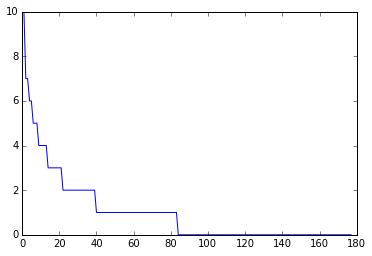

In [277]:
plot(df.train_count.values)

In [278]:
freq_cids = df.component_id[df.train_count >= 3].values
print len(freq_cids)
freq_cids

22


array(['C-1565', 'C-1208', 'C-1428', 'C-1345', 'C-1317', 'C-0401',
       'C-1587', 'C-1935', 'C-1404', 'C-1349', 'C-1585', 'C-1527',
       'C-1586', 'C-1783', 'C-1598', 'C-0063', 'C-1405', 'C-0598',
       'C-0616', 'C-1432', 'C-1500', 'C-1006'], dtype=object)

In [ ]:
straight = all_counts[all_counts.component_group_id == 'straight'].copy()
straight.sort('train_count', ascending=False, inplace=True)
straight[:10]